<a href="https://colab.research.google.com/github/Volkner90/School/blob/main/Intro_nn_iteso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10904539223494996683
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14357954560
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2345623093379848997
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

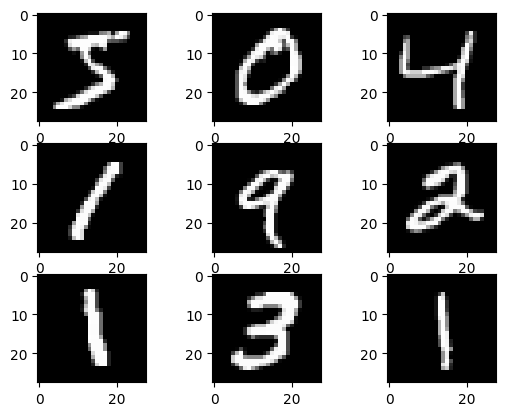

In [ ]:
from matplotlib import pyplot
import numpy as np

for i in range(0,9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X_train[i], cmap="gray")

pyplot.show()

# Preprocessing

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [ ]:
# number of labels
num_labels = len(np.unique(y_train))
print("num labels: ", num_labels)

num labels:  10


In [ ]:
y_train[0]

5

In [ ]:
y_train = to_categorical(y_train)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_test = to_categorical(y_test)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
image_size = X_train.shape[1]
image_size

28

In [ ]:
image_size = image_size * image_size
image_size

784

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = np.reshape(X_train, [-1, image_size])
X_train.shape

(60000, 784)

In [ ]:
X_train = X_train.astype("float32") / 255
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
X_test = np.reshape(X_test, [-1, image_size])
X_test = X_test.astype("float32") / 255


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

# Model - MLP

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout

In [ ]:
model = Sequential(name="MLP")

# size of neurons in the hidden layer
hidden_units = 250 # more units
dropout = .4 # more or less dropout

# Layer 1
model.add(Dense(hidden_units, input_dim = image_size, activation = "relu")) # tanh, sigmod
model.add(Dropout(dropout)) # regularization

# Layer 2
model.add(Dense(hidden_units, activation = "relu"))
model.add(Dropout(dropout)) # regularization

# Layer output
model.add(Dense(num_labels)) # output layer
model.add(Activation("softmax"))

model.summary()

Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 250)               196250    
                                                                 
 dropout_8 (Dropout)         (None, 250)               0         
                                                                 
 dense_13 (Dense)            (None, 250)               62750     
                                                                 
 dropout_9 (Dropout)         (None, 250)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                2510      
                                                                 
 activation_4 (Activation)   (None, 10)                0         
                                                                 
Total params: 261510 (1021.52 KB)
Trainable params: 261510 (102

In [ ]:
# compile
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "Adam", # Adam
    metrics = ["accuracy"]
)

In [ ]:
history = model.fit(
    x = X_train,
    y = y_train,
    validation_split = .1,
    epochs = 18, # more epochs
    batch_size = 128
)

Epoch 1/18
422/422 [==============================] - 3s 5ms/step - loss: 0.4233 - accuracy: 0.8714 - val_loss: 0.1202 - val_accuracy: 0.9658
Epoch 2/18
422/422 [==============================] - 2s 4ms/step - loss: 0.1898 - accuracy: 0.9419 - val_loss: 0.0939 - val_accuracy: 0.9738
Epoch 3/18
422/422 [==============================] - 2s 5ms/step - loss: 0.1473 - accuracy: 0.9550 - val_loss: 0.0819 - val_accuracy: 0.9757
Epoch 4/18
422/422 [==============================] - 2s 4ms/step - loss: 0.1228 - accuracy: 0.9628 - val_loss: 0.0722 - val_accuracy: 0.9785
Epoch 5/18
422/422 [==============================] - 2s 6ms/step - loss: 0.1039 - accuracy: 0.9675 - val_loss: 0.0704 - val_accuracy: 0.9798
Epoch 6/18
422/422 [==============================] - 2s 5ms/step - loss: 0.0947 - accuracy: 0.9699 - val_loss: 0.0678 - val_accuracy: 0.9800
Epoch 7/18
422/422 [==============================] - 2s 4ms/step - loss: 0.0867 - accuracy: 0.9727 - val_loss: 0.0629 - val_accuracy: 0.9810
Epoch 

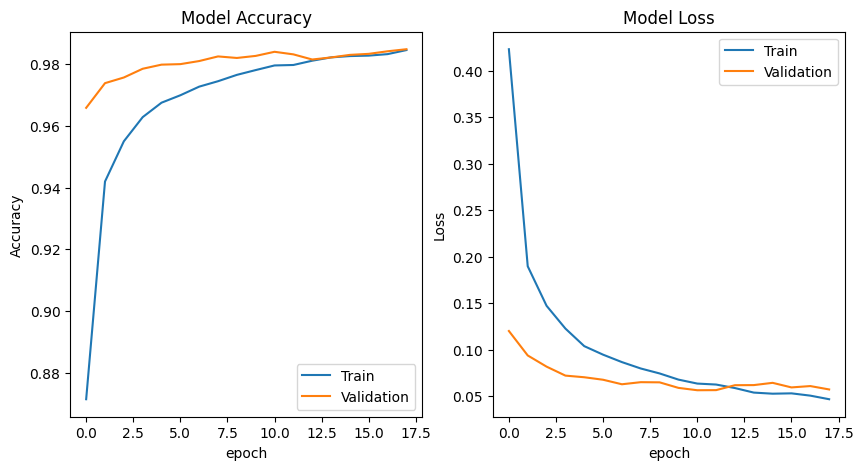

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc = "best")

plt.subplot(122)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc = "best")

# Testing

In [ ]:
_, acc = model.evaluate(
    X_test,
    y_test,
    batch_size = 128
)

print("Test accuracy: ", acc)

79/79 [==============================] - 0s 3ms/step - loss: 0.0622 - accuracy: 0.9821
Test accuracy:  0.9821000099182129


# Actividad
Un modelo de por lo menos 98% en el test Done

Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range= 10,
    zoom_range=.10,
    validation_split = 0.1
)
datagen

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.reshape(X_train, [-1,28,28,1])
X_train = X_train.astype("float32") / 255
X_test = np.reshape(X_test, [-1,28,28,1])
X_test = X_test.astype("float32") / 255


In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
datagen.fit(X_train)

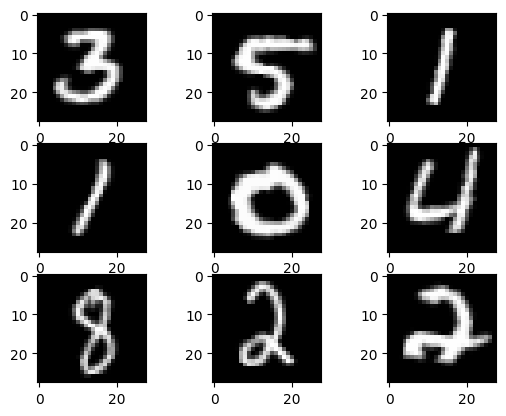

In [ ]:
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size =9 ):
  for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_batch[i].reshape(28,28), cmap = pyplot.get_cmap("gray"))
  pyplot.show()
  break

In [ ]:
train_generator = datagen.flow(X_train, y_train, batch_size = 128, subset = "training")
validation_generator = datagen.flow(X_train, y_train, batch_size = 128, subset = "validation")

CNN

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
model = Sequential(name="CNN")
model.add(Conv2D(32, kernel_size=3, input_shape = (28,28, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#classi
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_12 (Dropout)        (None, 1600)              0       

In [ ]:
model.compile(
    loss= "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
history = model.fit(
    x = X_train,
    y = y_train,
    validation_split = 0.1,
    epochs = 10,
)

Epoch 1/10
1688/1688 [==============================] - 14s 5ms/step - loss: 0.2064 - accuracy: 0.9366 - val_loss: 0.0604 - val_accuracy: 0.9830
Epoch 2/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0764 - accuracy: 0.9766 - val_loss: 0.0445 - val_accuracy: 0.9870
Epoch 3/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0601 - accuracy: 0.9810 - val_loss: 0.0391 - val_accuracy: 0.9888
Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0505 - accuracy: 0.9839 - val_loss: 0.0329 - val_accuracy: 0.9915
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0437 - accuracy: 0.9864 - val_loss: 0.0335 - val_accuracy: 0.9905
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0381 - accuracy: 0.9880 - val_loss: 0.0276 - val_accuracy: 0.9923
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0343 - accuracy: 0.9888 - val_loss: 0.0285 - val_accuracy

In [ ]:
model.evaluate(
    X_test,
    y_test,
    batch_size = 128,
    verbose = 0
)
print("Test Acc:", acc)

Test Acc: 0.9821000099182129


In [ ]:
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

Modelo con dataset de CIFAR10 con CNN with at least 80%